
# Task2

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
Hespress is a Moroccan news website that provides news and information about Morocco and the world to Arabic-speaking audiences. It was launched in 2007 and has become one of the most popular news websites in Morocco, with millions of monthly visitors. Hespress covers a wide range of topics, including politics, society, economy, sports, culture, and technology, among others.

#### Understanding Dataset**
Dataset contains 6 columns(id,title	date,author,story,topic) 

**title**  : Story title

**author** : The name of the author of the story

**topic**  : story category [**tamazight , sport , societe , regions , politique,
orbites , medias , marocains-du-monde , faits-divers , economie , art-et-culture**]

### Questions for Analysis

**1 .**What is the number of examples per class?

**2 .**What are top frequent n-grams generally and per class?

**3 .**What are lengths of examples in words and letters?

**4 .**What is the most frequent author name in each class?

**5 .**What is the most common year in the dataset?

### Install and import libraries

In [1]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install arabic-reshaper

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import libraries
import pandas as pd
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from collections import Counter

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [4]:
# read data set and concat different files
Data_Stories = pd.DataFrame()
Files = ['tamazight','sport','societe','regions','politique','orbites','medias','marocains-du-monde',
         'faits-divers','economie','art-et-culture']
# read each file in our dataset
for File in Files:
    Data_Stories = pd.concat([Data_Stories,pd.read_csv("stories_" + File + ".csv" ,encoding='utf-8')])

In [5]:
#reset index
Data_Stories.reset_index(inplace=True)

In [6]:
# check the data
Data_Stories.head()

,index,Unnamed: 0,id,title,date,author,story,topic
0,0,0,9de52a46055311eb8949646e69d991ea,وزارة التربية: لا تغيير في الغلاف الزمني للأما...,السبت 03 أكتوبر 2020 - 00:02,هسبريس من الرباط,قالت وزارة التربية الوطنية والتكوين المهني وال...,tamazight
1,1,1,9ee74b02055311ebb757646e69d991ea,"""تغييب"" تدريس الأمازيغية يغضب نقابات بتزنيت",الاثنين 28 شتنبر 2020 - 09:13,رشيد بيجيكن من أكادير,طالبت الكتابة الإقليمية للجامعة الوطنية للتعلي...,tamazight
2,2,2,9fed7812055311eb9158646e69d991ea,مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة,الاثنين 28 شتنبر 2020 - 00:41,هسبريس من الرباط,أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل...,tamazight
3,3,3,a0e39038055311eb8f78646e69d991ea,نص امتحان موحد يثير حنق فعاليات أمازيغية,السبت 26 شتنبر 2020 - 17:28,هسبريس من الرّباط,سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من ...,tamazight
4,4,4,a1d90814055311eb879e646e69d991ea,"""عادل تيزنيت"" يتحف المغاربة بالموسيقى الأمازيغية",السبت 26 شتنبر 2020 - 15:50,هسبريس من الرباط,من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمد...,tamazight


In [7]:
# remove unwanted columns
Data_Stories.drop(columns=["index","Unnamed: 0"],axis=1,inplace=True)

In [8]:
#check data
Data_Stories

,id,title,date,author,story,topic
0,9de52a46055311eb8949646e69d991ea,وزارة التربية: لا تغيير في الغلاف الزمني للأما...,السبت 03 أكتوبر 2020 - 00:02,هسبريس من الرباط,قالت وزارة التربية الوطنية والتكوين المهني وال...,tamazight
1,9ee74b02055311ebb757646e69d991ea,"""تغييب"" تدريس الأمازيغية يغضب نقابات بتزنيت",الاثنين 28 شتنبر 2020 - 09:13,رشيد بيجيكن من أكادير,طالبت الكتابة الإقليمية للجامعة الوطنية للتعلي...,tamazight
2,9fed7812055311eb9158646e69d991ea,مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة,الاثنين 28 شتنبر 2020 - 00:41,هسبريس من الرباط,أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل...,tamazight
3,a0e39038055311eb8f78646e69d991ea,نص امتحان موحد يثير حنق فعاليات أمازيغية,السبت 26 شتنبر 2020 - 17:28,هسبريس من الرّباط,سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من ...,tamazight
4,a1d90814055311eb879e646e69d991ea,"""عادل تيزنيت"" يتحف المغاربة بالموسيقى الأمازيغية",السبت 26 شتنبر 2020 - 15:50,هسبريس من الرباط,من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمد...,tamazight
...,...,...,...,...,...,...
10995,97e7b078055311eb972a646e69d991ea,مِهَنيّون: غياب توقيع رئيس الحكومة يوقف 200 مش...,الاثنين 18 نونبر 2019 - 00:25,هسبريس - وائل بورشاشن,تستمرّ الآثار الجانبية للانتقال الحكومي الأخير...,art-et-culture
10996,98f7723e055311ebb811646e69d991ea,"ندوة تقارب ""جهود السوسيين"" في خدمة العربية",الأحد 17 نونبر 2019 - 11:15,الحسين حرّان,"قال الدكتور المهدي السعيدي، في ندوة حول ""جهود ...",art-et-culture
10997,9a29bc06055311ebbb05646e69d991ea,تتويج أشرطة في مهرجان سينما الذاكرة المشتركة,السبت 16 نونبر 2019 - 20:17,هسبريس من الرباط,أجمعت لجنة المسابقة الخاصة بالأفلام المغربية ا...,art-et-culture
10998,9b547968055311ebb870646e69d991ea,ريشة التشكيلية بثينة أزمي تتمرد على الظلم والع...,السبت 16 نونبر 2019 - 10:00,هسبريس - كاميليا كريم,ألوان حيّة ولمسات تعبيرية تحْمل مآسي إنسانية ل...,art-et-culture


**Now we can start out analysis**

In [9]:
Data_Stories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11000 non-null  object
 1   title   11000 non-null  object
 2   date    11000 non-null  object
 3   author  11000 non-null  object
 4   story   11000 non-null  object
 5   topic   11000 non-null  object
dtypes: object(6)
memory usage: 515.8+ KB


as shown data has no null 

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (What is the number of examples per class?)

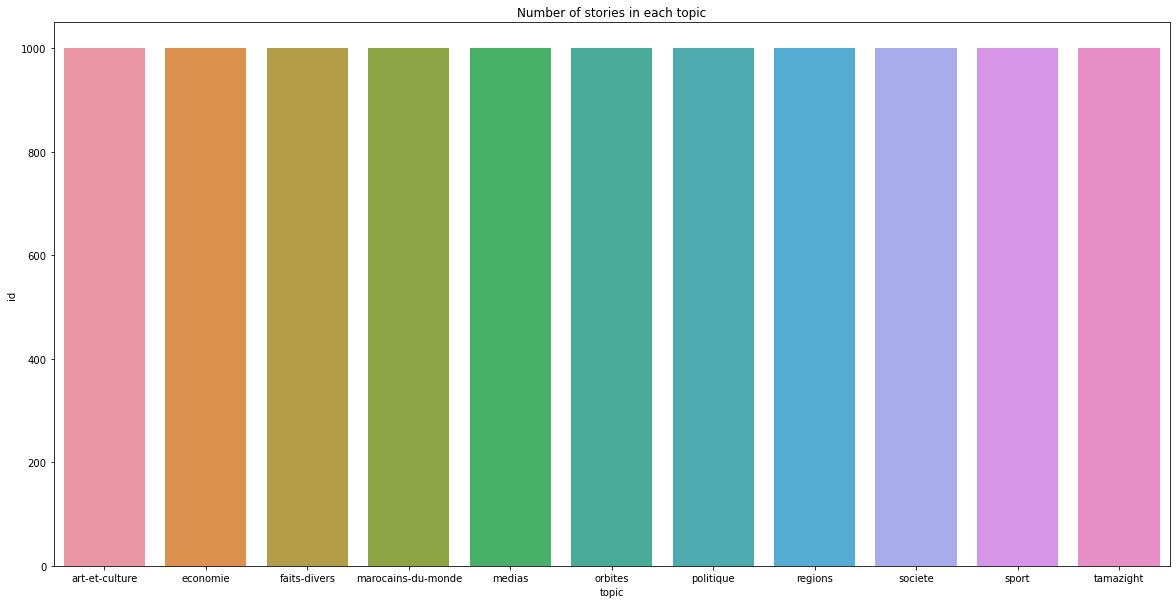

In [10]:
#count each class in the dataset and visualize it using bar chart
ax = sns.barplot(x ='topic', y ='id', data=Data_Stories.groupby('topic').count().reset_index(),)
ax.set_title('Number of stories in each topic') # Set plot title
ax.figure.set_size_inches(20, 10) # Set figure size

In [11]:
# to make sure that all classes are equal
Data_Stories.groupby('topic').story.count()

topic
art-et-culture        1000
economie              1000
faits-divers          1000
marocains-du-monde    1000
medias                1000
orbites               1000
politique             1000
regions               1000
societe               1000
sport                 1000
tamazight             1000
Name: story, dtype: int64

**As shown , dataset is balanced and each class has the same number of stories.**

### Research Question 2 (What are top frequent n-grams generally and per class?)

In [12]:
'''
function to extract n-grams from text : 

this function takes the story and the number of grams you want
and then it split each story to list of words then it iterates 
to len(list of words)-N+1 collect words together from i to i+N

'''
def get_ngrams(story, N):
    ngrams = []
    words = story.split()
    for i in range(len(words)-N+1):
        ngrams.append(' '.join(words[i:i+N]))
    return ngrams

In [13]:
'''
function to get the most freq ngrams

this function takes all Stories and the number of grams you want and number of rows 
you want to see from most frequent n-grams ,then it uses get_ngrams function to make 
the first step to get ngrams and then get the most common ngrams after that it return 
datframe with two column n-grams for the sentences and count that describe the frequency 
of this sentence.

'''
def get_top_ngrams(stories, N ,top_N):
    ngram_counts = Counter()
    for story in stories:
        ngrams = get_ngrams(story, N)
        ngram_counts.update(ngrams)
    top_ngrams = ngram_counts.most_common(top_N)
    top_ngrams_df = pd.DataFrame(top_ngrams, columns=[f'{N}-gram', 'Count'])
    return top_ngrams_df

In [14]:
# Get the top 10 5-grams from the "story" column
top_ngrams = get_top_ngrams(Data_Stories['story'],5,10)
top_ngrams.head()

,5-gram,Count
0,في تصريح لجريدة هسبريس الإلكترونية،,512
1,تصريح لجريدة هسبريس الإلكترونية، أن,329
2,الخارجية والتعاون الإفريقي والمغاربة المقيمين,243
3,الشؤون الخارجية والتعاون الإفريقي والمغاربة,240
4,الوطنية والتكوين المهني والتعليم العالي,195


In [15]:
'''
function to get top ngrams per class

this function takes our Data and the number of grams you want and number of rows 
you want to see from most frequent n-grams ,then it take each class and then apply
get_ngrams to each story in this class and also get the most frequent ngrams
in this class, we want to see the output as a dataframe so we creat a dicionary that contains
class name as a key and most frequent ngrams with its count as a value,after thatt we
convert this dictionary to dataframe with three columns [n-grms , count , class]

'''

def get_top_ngrams_per_class(Data, N, top_N):
    ngram_counts = {}
    for class_name in Data['topic'].unique():
        class_df = Data[Data['topic'] == class_name]
        class_ngram_counts = Counter()
        for text in class_df['story']:
            ngrams = get_ngrams(text, N)
            class_ngram_counts.update(ngrams)
        top_ngrams = class_ngram_counts.most_common(top_N)
        ngram_counts[class_name] = top_ngrams
    New = []
    for class_name, class_ngram_counts in ngram_counts.items():
        top_ngrams_df = pd.DataFrame(class_ngram_counts, columns=[f'{N}-gram', 'Count'])
        top_ngrams_df['class'] = class_name
        New.append(top_ngrams_df)
    return pd.concat(New, ignore_index=True)

In [16]:
get_top_ngrams_per_class(Data_Stories, 5, 1)

,5-gram,Count,class
0,القانون التنظيمي لتفعيل الطابع الرسمي,92,tamazight
1,الجامعة الملكية المغربية لكرة القدم,58,sport
2,في تصريح لجريدة هسبريس الإلكترونية،,126,societe
3,في تصريح لجريدة هسبريس الإلكترونية،,45,regions
4,الشؤون الخارجية والتعاون الإفريقي والمغاربة,126,politique
5,النبي صلى الله عليه وسلم,49,orbites
6,قراءة مواد بعض الجرائد الورقية,54,medias
7,المنتدبة المكلفة بالمغاربة المقيمين بالخارج,68,marocains-du-monde
8,تحت إشراف النيابة العامة المختصة،,134,faits-divers
9,وزير الاقتصاد والمالية وإصلاح الإدارة،,53,economie


- The most frequent 5-grams in stories in general is repeated 512 times.
- The most frequent 5-grams per class is repeated 134 at faits-divers class.

### Research Question 3  (What is the mean length of examples in words and letters?)

In [17]:
# function to calculate the length of each story in words
def count_words(text):
    return len(text.split())

# function to calculate the length of each story in letters
def count_letters(text):
    return len(text)

# Calculate the length of each story in words
Data_Stories['words'] = Data_Stories['story'].apply(count_words)

# Calculate the length of each story in letters
Data_Stories['letters'] = Data_Stories['story'].apply(count_letters)
Data_Stories.head()

,id,title,date,author,story,topic,words,letters
0,9de52a46055311eb8949646e69d991ea,وزارة التربية: لا تغيير في الغلاف الزمني للأما...,السبت 03 أكتوبر 2020 - 00:02,هسبريس من الرباط,قالت وزارة التربية الوطنية والتكوين المهني وال...,tamazight,83,554
1,9ee74b02055311ebb757646e69d991ea,"""تغييب"" تدريس الأمازيغية يغضب نقابات بتزنيت",الاثنين 28 شتنبر 2020 - 09:13,رشيد بيجيكن من أكادير,طالبت الكتابة الإقليمية للجامعة الوطنية للتعلي...,tamazight,246,1647
2,9fed7812055311eb9158646e69d991ea,مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة,الاثنين 28 شتنبر 2020 - 00:41,هسبريس من الرباط,أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل...,tamazight,218,1360
3,a0e39038055311eb8f78646e69d991ea,نص امتحان موحد يثير حنق فعاليات أمازيغية,السبت 26 شتنبر 2020 - 17:28,هسبريس من الرّباط,سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من ...,tamazight,96,609
4,a1d90814055311eb879e646e69d991ea,"""عادل تيزنيت"" يتحف المغاربة بالموسيقى الأمازيغية",السبت 26 شتنبر 2020 - 15:50,هسبريس من الرباط,من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمد...,tamazight,274,1710


<AxesSubplot:>

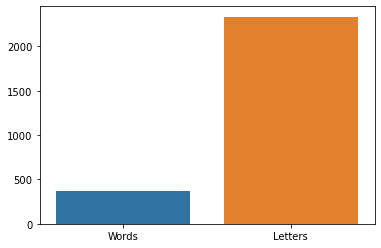

In [18]:
# we will calculate the mean length of words per story and the mean length leters per story
mean_words = Data_Stories['words'].mean()
mean_letters = Data_Stories['letters'].mean()
# Create the bar chart 
sns.barplot(x=['Words', 'Letters'], y=[mean_words, mean_letters])

In [19]:
print(mean_words,mean_letters)

370.4949090909091 2333.2716363636364


- The mean length of words per story is 371 word .
- The mean length of letters per story is 2334 letter.

### Research Question 4  (What is the most frequent author name in each class?)

In [20]:
'''creat a new dataframe called Authors that makes data of
authors's names into groups by their classes and calculate the frequency of
each author in each class
'''
Authors = Data_Stories.groupby('topic').author.value_counts(ascending=False)
Authors_df = Authors.reset_index(name='count')
Authors_df

,topic,author,count
0,art-et-culture,هسبريس من الرباط,433
1,art-et-culture,هسبريس - وائل بورشاشن,108
2,art-et-culture,محمد بنعزيز,37
3,art-et-culture,أيوب صدور من تطوان,21
4,art-et-culture,هسبريس - محمد الراجي,21
...,...,...,...
1430,tamazight,هسبريس-و.م.ع,1
1431,tamazight,هسبريس– نورالدين إكجان,1
1432,tamazight,وائل بورشاشن(*),1
1433,tamazight,وسام الحنكاري*,1


In [21]:
#Get the maximum count of each author per class
Authors_df.groupby('topic')['author','count'].max()

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_20900\1558299867.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Authors_df.groupby('topic')['author','count'].max()


,author,count
topic,,
art-et-culture,يوسف صدوق من الرياض*,433
economie,هسبريس- محمد بلقاسم,489
faits-divers,ياسين أوشن,259
marocains-du-monde,يونس إجيري من هلسنكي,372
medias,يوسف لهلالي من باريس,550
orbites,ياسين عدنان,437
politique,ياسين أوشن من خنيفرة,441
regions,ياسين عدنان (صور: أحمد بنسماعيل),189
societe,ياسين عدنان,523


- The most frequent author per class is Youssef Lahlali from Paris with 550 times at medias class.


### Research Question 5  (What is the most common year in the dataset?)

In [23]:
'''
create a list with years from 2000 to 2022 and then covert elements to string
to make it easy when we compare with date at dataset 
'''
year_list = range(2000,2022)
year_list =list(map(str, year_list))

In [24]:
'''
iterate in each data in the data sett and split it to take only the year 
,after that we will create new column named years and fill it with year of each story
'''
years=[]
for i in range (0,len(Data_Stories)):
    date = Data_Stories['date'][i].split()[3]
    if date in year_list:
        years.append(date)

In [25]:
Data_Stories['years'] = years

In [26]:
Data_Stories.head()

,id,title,date,author,story,topic,words,letters,years
0,9de52a46055311eb8949646e69d991ea,وزارة التربية: لا تغيير في الغلاف الزمني للأما...,السبت 03 أكتوبر 2020 - 00:02,هسبريس من الرباط,قالت وزارة التربية الوطنية والتكوين المهني وال...,tamazight,83,554,2020
1,9ee74b02055311ebb757646e69d991ea,"""تغييب"" تدريس الأمازيغية يغضب نقابات بتزنيت",الاثنين 28 شتنبر 2020 - 09:13,رشيد بيجيكن من أكادير,طالبت الكتابة الإقليمية للجامعة الوطنية للتعلي...,tamazight,246,1647,2020
2,9fed7812055311eb9158646e69d991ea,مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة,الاثنين 28 شتنبر 2020 - 00:41,هسبريس من الرباط,أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل...,tamazight,218,1360,2020
3,a0e39038055311eb8f78646e69d991ea,نص امتحان موحد يثير حنق فعاليات أمازيغية,السبت 26 شتنبر 2020 - 17:28,هسبريس من الرّباط,سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من ...,tamazight,96,609,2020
4,a1d90814055311eb879e646e69d991ea,"""عادل تيزنيت"" يتحف المغاربة بالموسيقى الأمازيغية",السبت 26 شتنبر 2020 - 15:50,هسبريس من الرباط,من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمد...,tamazight,274,1710,2020


<AxesSubplot:ylabel='years'>

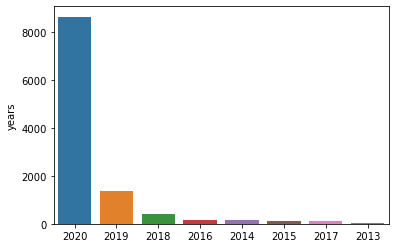

In [27]:
#visualize count of each year in the dataset
sns.barplot(x=Data_Stories['years'].value_counts().index, y=Data_Stories['years'].value_counts())

- The most common year in the dataset is 2020.

<a id='conclusions'></a>
## Conclusions
- Dataset is balanced and each class has the same number of stories.
- The most frequent 5-grams in stories in general is repeated 512 times.
- The most frequent 5-grams per class is repeated 134 at faits-divers class.
- The mean length of words per story is 371 word .
- The mean length of letters per story is 2334 letter. 
- The most frequent author per class is Youssef Lahlali from Paris with 550 times at medias class.
- The most common year in the dataset is 2020.
